In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('heart.csv')

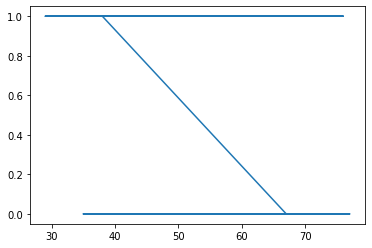

In [18]:
plt.plot(df['age'],df['target'])

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [26]:
X = df.iloc[:,2:13]

In [33]:
y = df.iloc[:,13:]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [43]:
X_train

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
209,0,140,177,0,1,162,1,0.0,2,1,3
45,1,120,325,0,1,172,0,0.2,2,0,2
298,0,140,241,0,1,123,1,0.2,1,0,3
229,2,125,309,0,1,131,1,1.8,1,0,3
242,0,145,212,0,0,132,0,2.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
142,2,120,209,0,1,173,0,0.0,1,0,2
188,2,140,233,0,1,163,0,0.6,1,1,3
36,2,135,304,1,1,170,0,0.0,2,0,2
278,1,136,319,1,0,152,0,0.0,2,2,2


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree = DecisionTreeClassifier()

In [49]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
predictions = tree.predict(X_test)

In [51]:
predictions


array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0])

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [57]:
results =  confusion_matrix(y_test,predictions)

In [58]:
results

array([[27,  5],
       [20, 39]])

In [59]:
accuracy_score(y_test,predictions)

0.7252747252747253

In [62]:
classification_report(y_test,predictions,output_dict = True)

{'0': {'precision': 0.574468085106383,
  'recall': 0.84375,
  'f1-score': 0.6835443037974684,
  'support': 32},
 '1': {'precision': 0.8863636363636364,
  'recall': 0.6610169491525424,
  'f1-score': 0.7572815533980584,
  'support': 59},
 'accuracy': 0.7252747252747253,
 'macro avg': {'precision': 0.7304158607350097,
  'recall': 0.7523834745762712,
  'f1-score': 0.7204129285977634,
  'support': 91},
 'weighted avg': {'precision': 0.7766860798775693,
  'recall': 0.7252747252747253,
  'f1-score': 0.7313519711209279,
  'support': 91}}

In [63]:
# Changing Algo to Increse the Accuracy

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
regressor = LogisticRegression()

In [66]:
regressor.fit(X_train,y_train)

/home/sunbeam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sunbeam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
prediction1 = regressor.predict(X_test)

In [90]:
prediction1

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0])

In [69]:
results =  confusion_matrix(y_test,prediction1)

In [70]:
results

array([[26,  6],
       [15, 44]])

In [71]:
accuracy_score(y_test,prediction1)

0.7692307692307693

In [76]:
from sklearn.linear_model import LinearRegression


In [77]:
regressor1 = LinearRegression()

In [78]:
regressor1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
predictions2 = regressor1.predict(testcase)

In [151]:
predictions2

array([[0.91704773]])

In [95]:
from sklearn.metrics import mean_squared_error

In [121]:
mean_squared_error(y_test,predictions2)


0.14284230804743614

In [123]:
accuracy  = 1 - mean_squared_error(y_test,predictions2)
accuracy

0.8571576919525639

In [98]:
testcase = df.iloc[:1,:]

In [99]:
testcase

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [109]:
testcase = testcase.drop('age',axis =1)

In [110]:
testcase = testcase.drop('sex',axis =1)

In [112]:
testcase = testcase.drop('target',axis = 1)

In [113]:
testcase

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3,145,233,1,0,150,0,2.3,0,0,1


In [114]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
regressor1.predict(testcase)

array([[0.91704773]])

In [116]:
regressor.predict(testcase)

array([1])

In [124]:
list1 = []

In [125]:
df['cp'].max()

3

In [126]:
cp = int(input("Enter your Cp should be in between 0 to 3"))

Enter your Cp should be in between 0 to 32


In [127]:
list1.append(cp)

In [128]:
list1

[2]

In [129]:
df['trestbps'].max()

200

In [130]:
trestbps = int(input("Enter bps between 0  to 200"))

Enter bps between 0  to 200120


In [132]:
list1.append(trestbps)

In [133]:
list1

[2, 120]

In [138]:
X_train

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
209,0,140,177,0,1,162,1,0.0,2,1,3
45,1,120,325,0,1,172,0,0.2,2,0,2
298,0,140,241,0,1,123,1,0.2,1,0,3
229,2,125,309,0,1,131,1,1.8,1,0,3
242,0,145,212,0,0,132,0,2.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
142,2,120,209,0,1,173,0,0.0,1,0,2
188,2,140,233,0,1,163,0,0.6,1,1,3
36,2,135,304,1,1,170,0,0.0,2,0,2
278,1,136,319,1,0,152,0,0.0,2,2,2


In [140]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [149]:
df['oldpeak'].max()

6.2

In [152]:
X_train.head(0)

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


In [153]:
list2 = [2,130,250,0,1,187,0,3,0,0,2]

In [160]:
testcase1 = pd.Series(list2)

In [170]:
testcase1 = pd.DataFrame(testcase1)

In [173]:
testcase1= pd.DataFrame.transpose(testcase1)

In [175]:
regressor.predict(testcase1)

array([1])